In [1]:
import os
import sys
import pandas as pd
import numpy as np
from utils.dataset import *
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tqdm import tqdm

In [2]:
pairs = 1000
pairdata, freqpairs, n_size, n_interval = get_univ_data(pairs)
sizedata = get_data(pairdata, freqpairs, 'size_index', n_size)

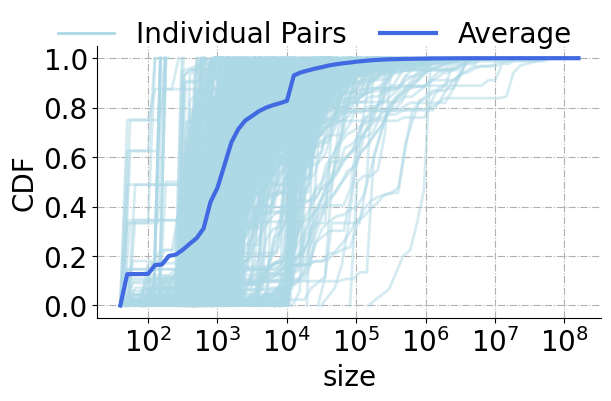

In [9]:
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.15, top=0.88, bottom=0.2, right=0.99)
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(2, 9, 1))
ax.set_xticklabels(["$10^%d$" % i for i in np.arange(2, 9, 1)], fontsize=20)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels(["%.1f"% i for i in np.arange(0, 1.1, 0.2)], fontsize=20)
ax.set_ylabel('CDF', fontsize=20)
ax.set_xlabel('size', fontsize=20)
plt.grid(linestyle='-.')

size = np.log10(pairdata[freqpairs[0]]['size'].values)
bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
counts, bins = np.histogram(size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=1.0, label='Individual Pairs')
for i in range(1, pairs):
    size = np.log10(pairdata[freqpairs[i]]['size'].values)
    bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
    counts, bins = np.histogram(size, bins)
    cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
    plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=0.5)

all_size = []
for i in range(pairs):
    all_size.extend(list(pairdata[freqpairs[i]]['size'].values))
all_size = np.log10(all_size)
bins = np.arange(np.min(all_size) - 0.1, np.max(all_size) + 0.1, 0.1)
counts, bins = np.histogram(all_size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=3, color='RoyalBlue', label='Average')
plt.legend(fontsize=20, frameon=False, loc=(-0.1, 0.95), ncol=2, columnspacing=1.2, labelspacing=0)

plt.savefig('figure/univ-size-cdf.pdf', dpi=400)

In [5]:
grams = {}
for i in [2, 3, 4]:
    grams[i] = np.zeros((pairs, n_size ** i))
    for pair in range(pairs):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += sizeindex[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        grams[i][pair][values] = counts
    grams[i] /= grams[i].sum(axis=1).reshape(-1, 1)

In [6]:
he_grams = {}
for i in [2, 3, 4]:
    he_grams[i] = np.zeros((pairs, n_size ** i))
    for pair in range(pairs):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        he_size_seq = np.random.permutation(sizeindex)
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += he_size_seq[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        he_grams[i][pair][values] = counts
    he_grams[i] /= he_grams[i].sum(axis=1).reshape(-1, 1)

In [7]:
def JSD(p, q):
    p = list(p)
    q = list(q)
    pq_max_len = max(len(p), len(q))
    p += [0.0] * (pq_max_len - len(p))
    q += [0.0] * (pq_max_len - len(q))
    assert (len(p) == len(q))
    m = np.sum([p, q], axis=0) / 2
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [8]:
jsds = {}
for i in range(2, 5):
    jsds[i] = []    
    for pair in tqdm(range(pairs)):
        jsds[i].append(JSD(grams[i][pair], he_grams[i][pair]))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [03:12<00:00,  5.19it/s]


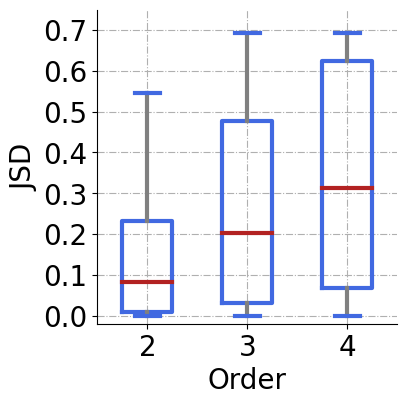

In [14]:
plt.figure(figsize=(4, 4))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0.23, top=0.95, bottom=0.165, right=0.98)
plt.boxplot([jsds[2], jsds[3], jsds[4]], labels=['2', '3', '4'], showfliers=False, widths=0.5, boxprops={'color': 'RoyalBlue', 'linewidth': 3},
medianprops={'color': 'FireBrick', 'linewidth': 3}, capprops={'color': 'RoyalBlue', 'linewidth': 3}, whiskerprops={'color': 'Gray', 'linewidth': 3},
flierprops={'markersize': 12})
plt.ylabel('JSD', fontsize=20)
plt.xlabel('Order', fontsize=20)
plt.grid(linestyle='-.')
plt.ylim(-0.02, 0.75)
plt.yticks(np.arange(0, 0.8, 0.1), fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('figure/univ-grams.pdf', dpi=400)
# plt.savefig('figure/fb-grams.png', bbox_inches='tight')

In [44]:
pairs = 5000
pairdata, freqpairs, n_size, n_interval = get_fb_data(pairs)
sizedata = get_data(pairdata, freqpairs, 'size_index', n_size)

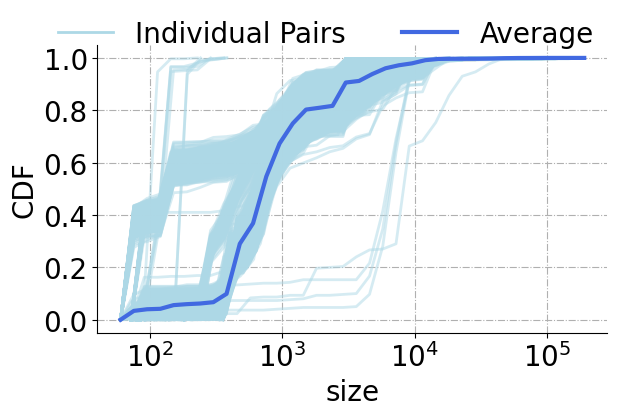

In [49]:
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.15, top=0.92, bottom=0.2, right=1.0)
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(2, 9, 1))
ax.set_xticklabels(["$10^%d$" % i for i in np.arange(2, 9, 1)], fontsize=20)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels(["%.1f"% i for i in np.arange(0, 1.1, 0.2)], fontsize=20)
ax.set_ylabel('CDF', fontsize=20)
ax.set_xlabel('size', fontsize=20)
plt.grid(linestyle='-.')

size = np.log10(pairdata[freqpairs[0]]['size'].values)
bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
counts, bins = np.histogram(size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=1.0, label='Individual Pairs')
for i in range(1, pairs):
    size = np.log10(pairdata[freqpairs[i]]['size'].values)
    bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
    counts, bins = np.histogram(size, bins)
    cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
    plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=0.5)

all_size = []
for i in range(pairs):
    all_size.extend(list(pairdata[freqpairs[i]]['size'].values))
all_size = np.log10(all_size)
bins = np.arange(np.min(all_size) - 0.1, np.max(all_size) + 0.1, 0.1)
counts, bins = np.histogram(all_size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=3, color='RoyalBlue', label='Average')
plt.legend(fontsize=20, frameon=False, loc=(-0.1, 0.95), ncol=2)


plt.savefig('figure/fb-size-cdf.pdf', dpi=400)

In [46]:
grams = {}
for i in [2, 3, 4]:
    grams[i] = np.zeros((pairs, n_size ** i))
    for pair in tqdm(range(pairs)):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += sizeindex[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        grams[i][pair][values] = counts
    grams[i] /= grams[i].sum(axis=1).reshape(-1, 1)

he_grams = {}
for i in [2, 3, 4]:
    he_grams[i] = np.zeros((pairs, n_size ** i))
    for pair in tqdm(range(pairs)):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        he_size_seq = np.random.permutation(sizeindex)
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += he_size_seq[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        he_grams[i][pair][values] = counts
    he_grams[i] /= he_grams[i].sum(axis=1).reshape(-1, 1)

100%|██████████| 5000/5000 [00:00<00:00, 5312.37it/s]


In [47]:
jsds = {}
for i in range(2, 5):
    jsds[i] = []    
    for pair in tqdm(range(pairs)):
        jsds[i].append(JSD(grams[i][pair], he_grams[i][pair]))

100%|██████████| 5000/5000 [18:14<00:00,  4.57it/s]


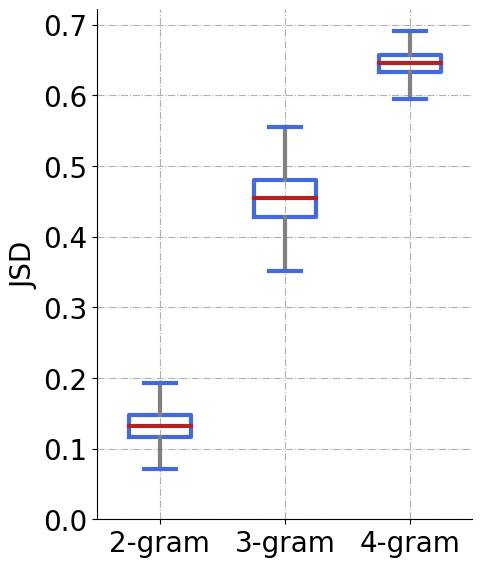

In [50]:
plt.figure(figsize=(5, 6))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.1, right=0.95)
plt.boxplot([jsds[2], jsds[3], jsds[4]], labels=['2-gram', '3-gram', '4-gram'], showfliers=False, widths=0.5, boxprops={'color': 'RoyalBlue', 'linewidth': 3},
medianprops={'color': 'FireBrick', 'linewidth': 3}, capprops={'color': 'RoyalBlue', 'linewidth': 3}, whiskerprops={'color': 'Gray', 'linewidth': 3},
flierprops={'markersize': 12})
plt.ylabel('JSD', fontsize=20, rotation=90)
plt.grid(linestyle='-.')
plt.yticks(np.arange(0, 0.8, 0.1), fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('figure/fb-grams.pdf', dpi=400)
# plt.savefig('figure/fb-grams.png', bbox_inches='tight')

In [47]:
np.random.seed(42)
ran_index = np.random.permutation(pairs)
train_index = ran_index[:100]
test_index = ran_index[100:]
trainset = sizedata[train_index].astype(np.float32)
testset = sizedata[test_index].astype(np.float32)

In [48]:
def cramer_dis(x, y):
    cdf_x = np.cumsum(x)
    cdf_y = np.cumsum(y)
    return np.sum(np.abs(cdf_x - cdf_y)) / x.shape[0]

def get_test_dis(testset, n):
    size_dis = np.zeros((n, len(testset)))
    for i in range(n):
        size = trainset[i]
        for j, testdata in enumerate(testset):
            loss = cramer_dis(size, testdata)
            size_dis[i][j] = loss
    return size_dis

In [49]:
test_dis = get_test_dis(testset, 100)
test_cov = np.percentile(np.min(test_dis, axis=0), [50, 90, 95, 99])
test_cov

array([0.00996249, 0.04167203, 0.05198114, 0.11606952])

In [68]:
size_cdf = pd.read_csv('data/univ/size_cdf.csv')
size_cdf = np.concatenate(([0], (size_cdf['size'].values[1:] + size_cdf['size'].values[:-1]) / 2))
mean_sizes = (sizedata * size_cdf).sum(axis=1)
index = np.argsort(mean_sizes)[500:1000:20]
index = np.random.permutation(index)

In [70]:
mean_sizes[0:25]

array([  1693.75      ,   4756.25      , 318991.875     ,   5495.        ,
        58940.        ,  15025.        ,   4531.25      ,   5619.5       ,
         2728.        , 142025.        ,   1640.625     ,   7912.80487805,
       157926.82926829, 103265.85365854,    625.        ,  34195.12195122,
       137810.97560976,    637.19512195,   1826.2195122 ,   1640.24390244,
       184370.97560976,  12646.34146341,   3881.09756098,   3128.04878049,
         4737.80487805])

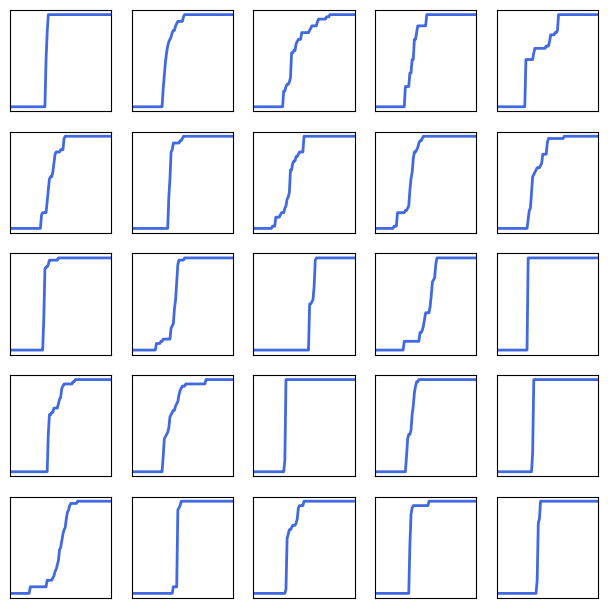

In [72]:
fig = plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.01, top=0.99, bottom=0.01, right=0.99)
bins = np.arange(0, 9, 0.1)
for i in range(1, 26):
    ax = plt.subplot(5,5,i)
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', labelbottom=False, bottom=False) 
    ax.tick_params(axis='y', labelleft=False, left=False) 
    ax.set_xlim([0, 9])
    size = np.log10(pairdata[freqpairs[i - 1]]['size'].values)
    # bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
    counts, bins = np.histogram(size, bins)
    cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
    ax.plot(bins[1:], cdf, linewidth=2, color='RoyalBlue', alpha=1.0, label='Individual Pairs')
plt.savefig('figure/distributions.pdf', dpi=400)

In [51]:
np.min(all_size) - 0.1, np.max(all_size) + 0.1

(1.5020599913279624, 8.272932916318236)

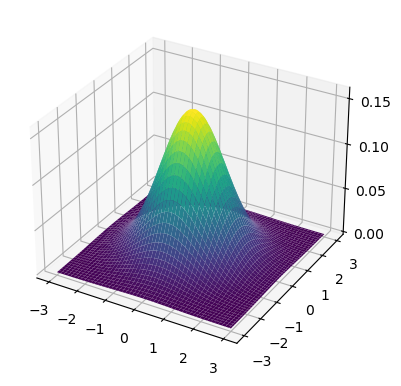

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1

#Create grid and multivariate normal
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(4, 4))
plt.subplots_adjust(left=0.01, top=1, bottom=-0, right=0.90)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_zticks([0, 0.05, 0.10, 0.15])
# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')
plt.savefig('figure/normal.pdf', dpi=400)